#Libraries, Directory, Data

In [53]:
%cd /content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst/Statistics and Descriptive Analytics/Multilinear Regression


In [117]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [119]:
!pip install scikit-learn

In [55]:
#Load the dataset
df = pd.read_csv("salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


#Analayzing the data

In [139]:
#Summary statistics
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


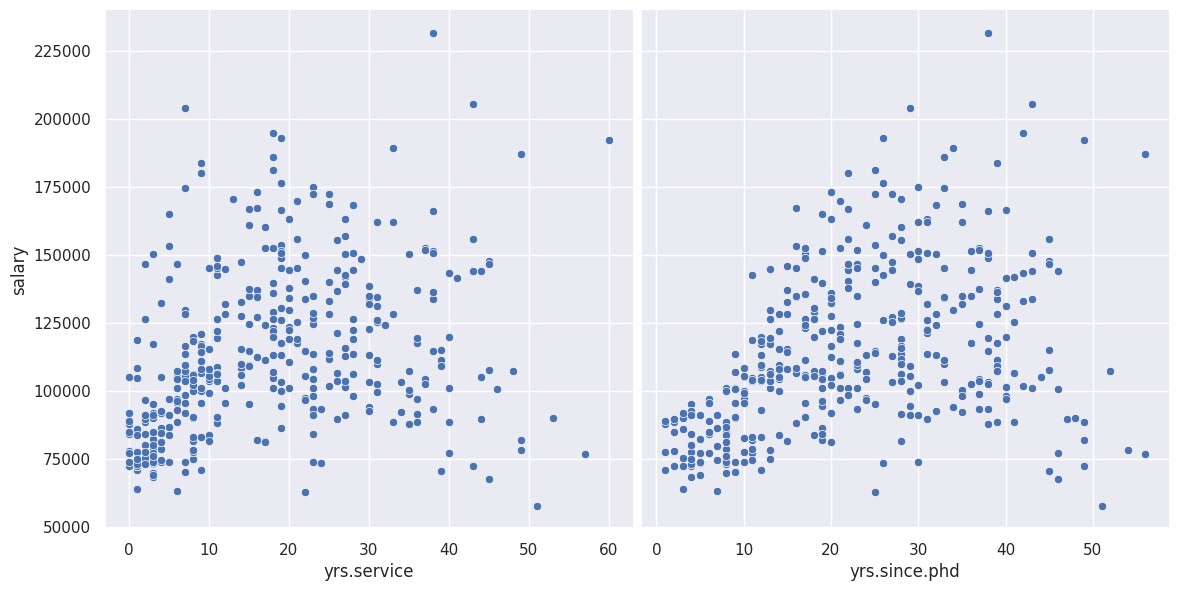

In [140]:
#Plotting continuous IV against dependent variable
sns.set(font_scale = 1)
sns.pairplot(data = df,
             y_vars = 'salary',
             x_vars = ['yrs.service', 'yrs.since.phd'],
             height = 6)

<Axes: >

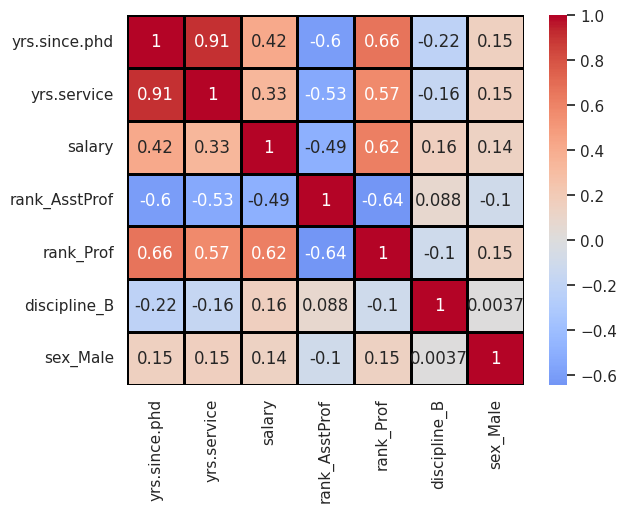

In [141]:
#Correlation Matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths=1,
            linecolor = 'black')

In [142]:
#Categorical Variables
df['rank'].value_counts()

KeyError: 'rank'

In [ ]:
df.select_dtypes(include=['object']).value_counts()

In [ ]:
#For loop categorical variables
categorical = df.select_dtypes(include=['object'])
categorical

In [ ]:
categorical = list(df.select_dtypes(include=['object']))
categorical

In [ ]:
categorical = df.select_dtypes(include=['object'])
for cat in categorical:
  print(df[cat].value_counts())

In [ ]:
#Let's look at the data
df.head(1)

In [ ]:
#Transform objects to dummies.
df = pd.get_dummies(data = df, drop_first = True)
df.head(2)

#Multilinear regression preperation

In [136]:
#Isolate X and Y
y = df.salary / 1000
x = df.drop(columns = ['salary', 'yrs.service'])
x.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,False,True,True,True


In [137]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,False,True,True,True
1,1.0,20,False,True,True,True
2,1.0,4,True,False,True,True
3,1.0,45,False,True,True,True
4,1.0,40,False,True,True,True


In [138]:
#Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head(2)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,False,True,False,True
287,1.0,2,True,False,False,True


#Multilinear Regression

In [135]:
#Regression
model = sm.OLS(y, X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     63.27
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.93e-48
Time:                        23:54:53   Log-Likelihood:                -1799.2
No. Observations:                 397   AIC:                             3610.
Df Residuals:                     391   BIC:                             3634.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            80.9885      4.932     16.422

#Accuracy Assessment

In [113]:
#Predict
predictions = model.predict(X_test)
predictions[:4]

364    120.889718
30      133.42393
378    120.584662
188    100.983624
dtype: object

In [134]:
#Accuracy Assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error # Fix the import statement
print("MAE:", round(mean_absolute_error(y_test, predictions)))
print("RSME:", round(np.sqrt(mean_squared_error(y_test, predictions)), 1))

MAE: 18
RSME: 25.5
